<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Retail_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx')

# 1. Reading the data

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.1 Reading basic stats of data

In [15]:
df.shape

(525461, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [18]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


* We can see that Quantity and Price have negative values which is not possible in real life. 
* There is a possibility that these two features contains outliers.

## 1.3 Checking for missing values

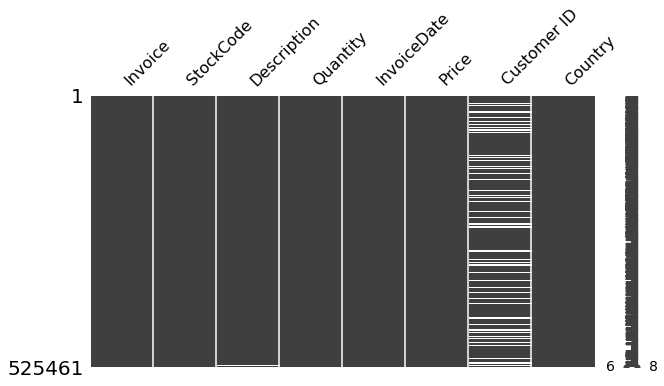

In [9]:
import missingno
missingno.matrix(df, figsize=(10,5))

* We can see that Customer Id feature contains a lot of missing values.
* We'll remove those records as there is no way we could replace them because they are unique to every customer.

In [19]:
df['Customer ID'].isnull().sum()

107927

In [20]:
df.dropna(inplace = True)

In [21]:
df.shape

(417534, 8)

## 1.4 Check for duplicate records in dataframe

In [22]:
df.duplicated().sum()

6771

* 6771 duplicate records 
* drop the duplicate records

In [23]:
print(df[df.duplicated()].head())

    Invoice StockCode  ... Customer ID         Country
371  489517     21912  ...     16329.0  United Kingdom
383  489517     22130  ...     16329.0  United Kingdom
384  489517     22319  ...     16329.0  United Kingdom
385  489517     21913  ...     16329.0  United Kingdom
386  489517     21821  ...     16329.0  United Kingdom

[5 rows x 8 columns]


In [24]:
df.shape

(417534, 8)

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df.shape

(410763, 8)

In [27]:
df.duplicated().sum()

0

# 2. Univariate Analysis of every feature

### 2.1 Invoice 

In [28]:
df.Invoice.value_counts()

500356     251
507235     250
511522     240
526089     240
511051     236
          ... 
494888       1
C515778      1
494809       1
494805       1
C498598      1
Name: Invoice, Length: 23587, dtype: int64

* If Invoice Code starts from 'C' then it refers to cancellation of that order.
* We'll count such orders and store their index in indices.

In [29]:
noc = 0
indices = []
for index, row in df.iterrows():
  invoice = row['Invoice']
  invoice = str(invoice)
  if (invoice[0] == 'C'):
    noc += 1
    indices.append(index)


In [30]:
indices[0:10]

[178, 179, 180, 181, 182, 183, 184, 185, 186, 196]

In [31]:
print(noc)

9816


* There are total 9816 orders cancelled. 

In [32]:
df.drop(indices,inplace = True,axis = 0)

* We've removed such records.

In [33]:
df.shape

(400947, 8)

### 2.2 Quantity

* We'll cross check if there is any quantity which has a negative value and then we'll remove them as well.

In [35]:
df['Quantity'].describe()

count    400947.000000
mean         13.768523
std          97.639816
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

In [36]:
len(df[df['Quantity'] < 0 ])

0

* We can see that there are no items whose quantities are negative.
* Hence all our cancellations have been removed. 

### 2.3 StockCode

In [37]:
df.StockCode.value_counts()

85123A    3107
85099B    1730
22423     1696
21212     1553
21232     1372
          ... 
46138D       1
35950        1
35945        1
35930        1
35974        1
Name: StockCode, Length: 4017, dtype: int64

### 2.4 Price

In [38]:
len(df[df['Price'] < 0 ])

0

No value of Price for the item is negative.

* Check for the minimum and maximum value for price of item

In [40]:
print(df['Price'].min())
print(df['Price'].max())

0.0
10953.5


### 2.4 Country

In [42]:
df.Country.value_counts()

United Kingdom          364255
EIRE                      8503
Germany                   7652
France                    5452
Netherlands               2729
Spain                     1228
Switzerland               1170
Belgium                   1037
Portugal                   983
Sweden                     867
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
Norway                     365
Finland                    347
United Arab Emirates       315
Unspecified                277
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Brazil  

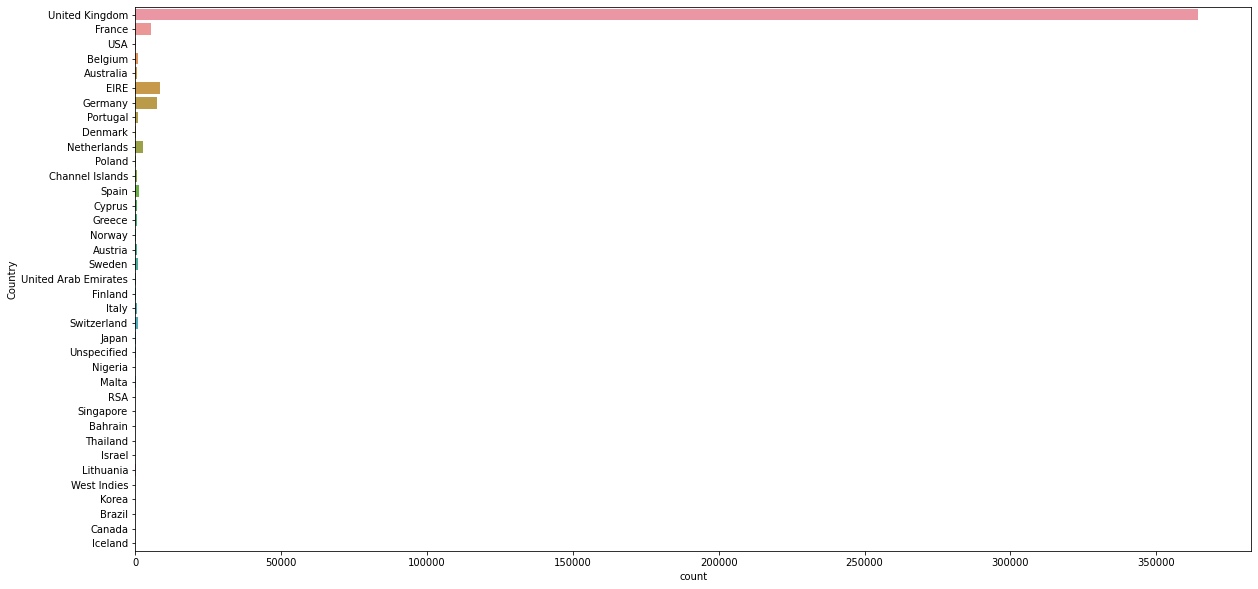

In [43]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Country',data = df);


* Most of the transactions we've are from UK.

### 2.5 Customer ID

In [44]:
df['Customer ID'].value_counts()

14911.0    5568
17841.0    4944
14606.0    3802
14156.0    2646
12748.0    2532
           ... 
14495.0       1
16737.0       1
16219.0       1
14906.0       1
13270.0       1
Name: Customer ID, Length: 4314, dtype: int64

* We've records of 4314 customers.

* Customer ID refers to the id of a single customer. 
* Customer with ID = 14911 occurs max number of time. 
* It can be concluded that this customer has done maximum purchasing in the store.

In [45]:
df[df['Customer ID'] == 14911].InvoiceDate.value_counts()

2010-10-03 12:40:00    112
2010-05-09 12:49:00    106
2010-06-14 14:06:00    101
2010-10-27 13:29:00     89
2010-03-30 09:47:00     79
                      ... 
2010-03-24 10:42:00      1
2010-12-06 13:32:00      1
2010-01-08 10:39:00      1
2010-08-19 14:24:00      1
2010-10-22 09:45:00      1
Name: InvoiceDate, Length: 204, dtype: int64

* There are 204 different dates when the customer with id = 14911 has engaged with store.


In [46]:
df[df['Customer ID'] == 14911]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE
441,489520,72739B,WHITE CHOCOLATE SCENT CANDLE,12,2009-12-01 11:41:00,1.25,14911.0,EIRE
442,489520,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2009-12-01 11:41:00,3.95,14911.0,EIRE
443,489520,22212,FOUR HOOK WHITE LOVEBIRDS,6,2009-12-01 11:41:00,2.10,14911.0,EIRE
444,489520,21523,FANCY FONT HOME SWEET HOME DOORMAT,2,2009-12-01 11:41:00,6.75,14911.0,EIRE
...,...,...,...,...,...,...,...,...
523021,538009,21754,HOME BUILDING BLOCK WORD,3,2010-12-09 12:17:00,5.95,14911.0,EIRE
523022,538009,22840,ROUND CAKE TIN VINTAGE RED,2,2010-12-09 12:17:00,7.95,14911.0,EIRE
523023,538009,22842,BISCUIT TIN VINTAGE RED,2,2010-12-09 12:17:00,6.75,14911.0,EIRE
523024,538009,22197,SMALL POPCORN HOLDER,36,2010-12-09 12:17:00,0.85,14911.0,EIRE


* From the above, it can be observed that customer with id = 14911 has done the transactions in both the years 2009 and 2010.
* **Loyal Customer** - how willing a customer is to engage with and repeatedly purchase from you versus your competitors.
* Customer with Customer ID = 14911 can be also be called most loyal customer as he/she engaged with the store for both the years given in data.

### 2.6 InvoiceDate

In [47]:
df.InvoiceDate.value_counts()

2010-03-07 15:34:00    251
2010-05-07 09:04:00    250
2010-10-08 12:14:00    240
2010-06-08 16:47:00    240
2010-06-06 12:13:00    236
                      ... 
2010-02-02 14:11:00      1
2010-09-16 10:17:00      1
2010-08-15 11:12:00      1
2010-06-11 15:23:00      1
2010-07-09 12:17:00      1
Name: InvoiceDate, Length: 18010, dtype: int64

In [48]:
date_dict = df.InvoiceDate.value_counts()

In [50]:
date_dict[0:30]

2010-03-07 15:34:00    251
2010-05-07 09:04:00    250
2010-10-08 12:14:00    240
2010-06-08 16:47:00    240
2010-06-06 12:13:00    236
2010-11-07 16:29:00    228
2010-10-07 16:48:00    226
2010-11-28 14:57:00    215
2010-11-21 13:13:00    202
2010-05-16 16:05:00    201
2010-11-15 14:26:00    200
2010-01-07 11:52:00    199
2010-11-21 14:10:00    199
2010-10-07 10:39:00    190
2010-07-01 11:59:00    186
2010-06-22 14:21:00    184
2010-10-26 16:47:00    182
2010-05-16 12:51:00    180
2010-10-17 16:17:00    173
2010-10-05 14:05:00    172
2010-05-25 13:21:00    171
2010-11-23 13:36:00    171
2010-11-16 10:05:00    166
2010-03-22 14:30:00    165
2010-08-05 14:57:00    164
2010-07-25 15:40:00    163
2010-06-14 14:27:00    161
2009-12-08 15:12:00    159
2010-10-19 15:33:00    158
2010-11-11 13:50:00    155
Name: InvoiceDate, dtype: int64

From above we can say that the year end of 2009 and 2010 are the most popular time of the year based on this data.

In [51]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [52]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


* Let's add a new feature TotalPrice which is equal to Price*Quantity.

In [53]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


* Add three other features which are day, month and year.

In [118]:
df['InvoiceDate Day'] = df['InvoiceDate'].dt.day
df['InvoiceDate Month'] = df['InvoiceDate'].dt.month
df['InvoiceDate year'] = df['InvoiceDate'].dt.year

In [119]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceDate Day,InvoiceDate Month,InvoiceDate year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1,12,2009


#### 2.6.1 Plot the dataset df with x = TotalPrice and y = InvoiceDate to check if there's any seasonality present.

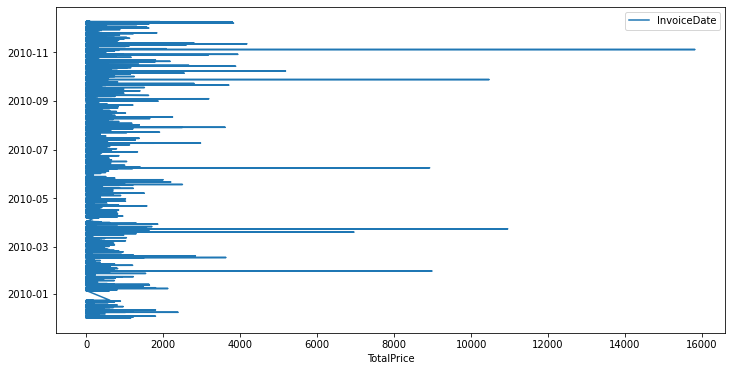

In [54]:
df.plot(y = 'InvoiceDate', x = 'TotalPrice', figsize = (12,6))

* Yes, according to the graphs above, we can see seasonality in data based on Date

Conclusion
* Higher value of prices during the year end.
* During the year end the two main events like Christmas and New Year are observed which can be the reason for more amount of expenditure. 


### 2.7 Description

In [55]:
desc_dict = df.Description.value_counts()

In [115]:
desc_dict.shape

(4444,)

* 4444 unique items are being sold.

In [56]:
desc_dict[0:20]

WHITE HANGING HEART T-LIGHT HOLDER    3107
REGENCY CAKESTAND 3 TIER              1696
STRAWBERRY CERAMIC TRINKET BOX        1372
ASSORTED COLOUR BIRD ORNAMENT         1355
HOME BUILDING BLOCK WORD              1192
PACK OF 72 RETRO SPOT CAKE CASES      1183
60 TEATIME FAIRY CAKE CASES           1169
REX CASH+CARRY JUMBO SHOPPER          1099
JUMBO BAG RED RETROSPOT               1075
LUNCH BAG RED SPOTTY                  1069
HEART OF WICKER LARGE                 1027
WOODEN FRAME ANTIQUE WHITE            1021
RED HANGING HEART T-LIGHT HOLDER      1013
LUNCH BAG  BLACK SKULL.                996
JUMBO STORAGE BAG SUKI                 974
LUNCH BAG SUKI  DESIGN                 970
LOVE BUILDING BLOCK WORD               965
PACK OF 60 PINK PAISLEY CAKE CASES     946
JUMBO SHOPPER VINTAGE RED PAISLEY      930
LUNCH BAG SPACEBOY DESIGN              920
Name: Description, dtype: int64

* top 20 items that were sold are printed.


### 2.8 TotalPrice

#### Which country will be the most profitable for the company?

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

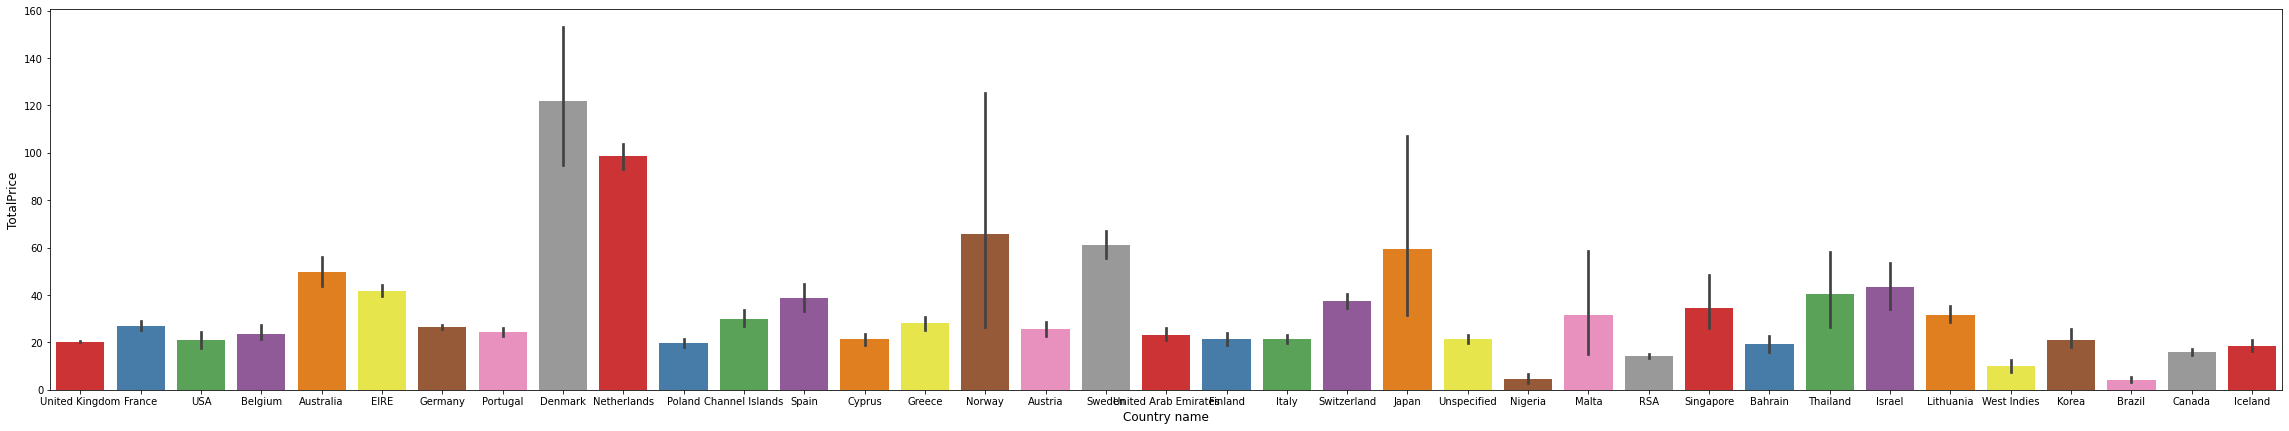

In [114]:
plt.figure(figsize=(40,7))
sns.barplot(df['Country'],df['TotalPrice'],palette='Set1')
plt.xlabel('Country name',fontsize='12')
plt.xticks(fontsize='10')
plt.ylabel('TotalPrice',fontsize='12')
plt.yticks(fontsize='10')

* From the above graph, it can be concluded that **Denmark** is most profitable for the company. 

###2.9 InvoiceDate Month

### Which month has the highest number of sales?

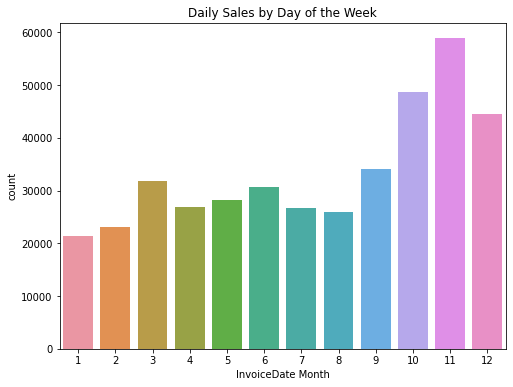

In [120]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['InvoiceDate Month'])

* November has the most amount of sales followed by October and December.
* These are also the festival months which explains the reason for high sales.

### 2.10 InvoiceDate Hour

### Which hour of the day is the busiest? 

Text(0.5, 1.0, 'Product Sales per Hour')

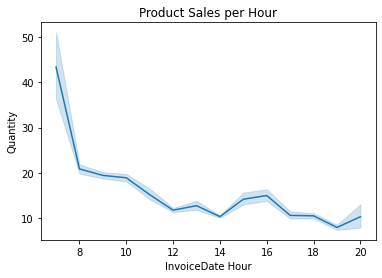

In [122]:
df['InvoiceDate Hour'] = (df['InvoiceDate']).dt.hour

sns.lineplot(x="InvoiceDate Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

* Early morning hours are the busiest.

##3. Segmenting the customers

For segmenting customer, there are some metrics that we can use, known as RFM
* Recency(R) -  when did the customer bought the product for last time
* Frequency(F) - how frequent the customer buy the products.
* Monetary(M) - how much the customer pays for the product.

* For simplicity, we'll create a new dataframe and add columns relevant to calculation of RFM scores

In [58]:
df_seg = pd.DataFrame()

In [59]:
df_seg['InvoiceDate'] = df['InvoiceDate'].dt.date
df_seg['TotalSum'] = df['TotalPrice']
df_seg['Customer ID'] = df['Customer ID']
df_seg['Invoice'] = df['Invoice']

In [60]:
df_seg.head()

,InvoiceDate,TotalSum,Customer ID,Invoice
0,2009-12-01,83.4,13085.0,489434
1,2009-12-01,81.0,13085.0,489434
2,2009-12-01,81.0,13085.0,489434
3,2009-12-01,100.8,13085.0,489434
4,2009-12-01,30.0,13085.0,489434


* Calculate the reference_date, here we'll take the next date after the most recent purchase date.

In [61]:
import datetime
reference_date = max(df_seg.InvoiceDate) + datetime.timedelta(days=1)

In [62]:
reference_date

datetime.date(2010, 12, 10)

* Group the customers on the basis of their Customer Id.
* Count the total number of invoice generated for that customer.
* Calculate the recency value which will be difference of days between the reference date and the date when last transaction for that customer occurred.

In [63]:
customers = df_seg.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'Invoice': 'count',
    'TotalSum': 'sum'})

* A new dataframe **customers** has been created.

In [64]:
customers.head()

,InvoiceDate,Invoice,TotalSum
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


* Rename the columnns.

In [65]:
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'Invoice': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [66]:
customers.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93


In [67]:
customers.shape

(4314, 3)

Plot the following plots to observe the relation.

### 3.1 Recency vs Frequency 

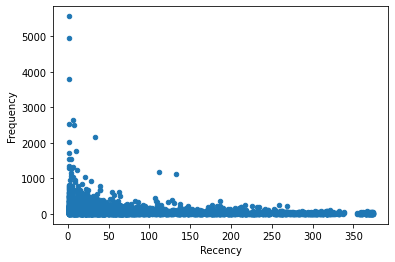

In [68]:
customers.plot(kind='scatter', x='Recency', y='Frequency') 
plt.show()

* Most recent customers tend to do the purchasing more often.

### 3.2 MonetaryValue vs Frequency



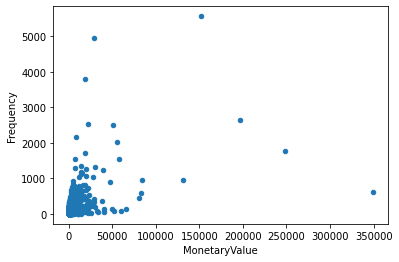

In [69]:
customers.plot(kind='scatter', x='MonetaryValue', y='Frequency') 
plt.show()

* Customers who purchase frequently spend less amount of money. 

### 3.3  Recency vs MonetaryValue

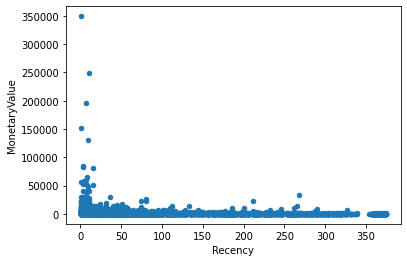

In [70]:
customers.plot(kind='scatter', y='MonetaryValue', x='Recency') 
plt.show()

* Most recent customers tend to spend more amount of money.

### 3.4 How will we segment customers?


* We can bucket the customers based on the above 3 Factors(RFM).
For example, put all the customers whose Recency is less than 60 days in 1 bucket. Similarly, customers whose Recency is greater than 60 days and less than 120 days in another bucket. We will apply the same concept for Frequency and Monetary also.

* The ideal customers for e-commerce companies are generally the most recent ones compared to the date of study(our reference date) who are very frequent and who spend enough.

* Based on the RFM Values, a score is assigned to each customer between 1 and 3.
* 3 is the best score and 1 is the worst score.

Print the statistic measures of RFM values

In [71]:
customers.describe()

,Recency,Frequency,MonetaryValue
count,4314.000000,4314.000000,4314.000000
mean,91.269819,92.940890,2039.460766
std,96.944304,198.883579,8909.797773
min,1.000000,1.000000,0.000000
25%,18.000000,18.000000,307.105000
50%,53.000000,43.000000,700.405000
75%,136.000000,100.000000,1713.297500
max,374.000000,5568.000000,349164.350000


* To calculate R score, we divide customers into 3 segments.
  1. If recency <= 60, that means the customer is a recent one. 
     So, R = 3.
  2. If recency > 60 and recency <= 120 then R = 2.
  3. Otherwise R = 1



In [72]:
def R_Score(x):
  if (x['Recency'] <= 60):
    recency = 3
  elif (x['Recency'] > 60 and x['Recency'] <=120):
    recency = 2
  else:
    recency = 1
  return recency

customers['R'] = customers.apply(R_Score, axis=1)

* To calculate F score, we divide customers into 3 segments.
  1. If Frequency <= 1856, that means the customer purchases less frequently. 
     So, F = 1.
  2. If frequency lies between 1856-3712 then F = 2.
  3. Otherwise F = 3, i.e. customers purchases very frequently.

In [73]:
def F_Score(x):
  if (x['Frequency'] <= 1856):
    frequency = 1
  elif (x['Frequency'] > 1856 and x['Frequency'] <= 3712):
    frequency = 2
  else:
    frequency = 3
  return frequency

customers['F'] = customers.apply(F_Score,axis=1)

* To calculate M score, we divide customers into 3 segments.
  1. If MonetaryValue <= 50000, that means the customer does not spend much.
     So, M = 1.
  2. If MonetaryValue lies between 50000 - 100000 then M = 2.
  3. Otherwise M = 3, i.e. customers spends a lot.

In [74]:
def M_Score(x):
  if (x['MonetaryValue'] <= 50000):
    mv = 1
  elif (x['MonetaryValue'] > 50000 and x['MonetaryValue'] <= 100000):
    mv = 2
  else:
    mv = 3
  return mv

customers['M'] = customers.apply(M_Score,axis=1)

In [75]:
customers.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,165,33,372.86,1,1,1
12347.0,3,71,1323.32,3,1,1
12348.0,74,20,222.16,2,1,1
12349.0,43,102,2671.14,3,1,1
12351.0,11,21,300.93,3,1,1


* Calculate the RFM score by combining all three values of R, F and M.

In [77]:
def RFM_Score(x):
  return (str(x['R']) + str(x['F']) + str(x['M']))
customers['RFM_Score'] = customers.apply(RFM_Score,axis=1)

In [78]:
customers.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
Customer ID,,,,,,,
12346.0,165,33,372.86,1,1,1,111
12347.0,3,71,1323.32,3,1,1,311
12348.0,74,20,222.16,2,1,1,211
12349.0,43,102,2671.14,3,1,1,311
12351.0,11,21,300.93,3,1,1,311


* Reset index of customers dataframe.

In [79]:
customers.reset_index(inplace = True)

In [80]:
customers.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
0,12346.0,165,33,372.86,1,1,1,111
1,12347.0,3,71,1323.32,3,1,1,311
2,12348.0,74,20,222.16,2,1,1,211
3,12349.0,43,102,2671.14,3,1,1,311
4,12351.0,11,21,300.93,3,1,1,311


#### Segmentation Categories
  1. **Lost Cheap Customers**- Haven't purchased from a long time, doesn't purchase frequently and spend less.
  2. **Lost Big Customers** - Haven't purchased from a long time, but purchased frequently and spent good in past.
  3. **Almost Lost Big Customers** - Haven't purchased from some time, purchased frequently and spent huge in the past.
  4. **Best Customers** - Purchased most recently, most often and spend most.
  5. **Loyal Customers** - Purchase more frequently.
  6. **Big Spenders** - Customers who spend the most. 
  7. **Others**

#### Value of R,F,M and its interpretation
* R = 3,2,1 (Most recent, recent, purchased long time back)
* F = 3,2,1 (Most frequent, frequent, very low frequency)
* M = 3,2,1 (Most spend, Good Spend, Low Spend/cheap)

In [89]:
segment = [0] * len(customers)

for i in range(0,len(customers)):
  if customers['RFM_Score'][i]=='111':
    segment[i]='Lost Cheap Customers'
  elif (customers['RFM_Score'][i]=='133'  or customers['RFM_Score'][i] == '122' or customers['RFM_Score'][i] == '132' or customers['RFM_Score'][i] == '123'):
    segment[i]='Lost Big Customers'
  elif (customers['RFM_Score'][i]=='233' or customers['RFM_Score'][i]=='223'):
    segment[i]='Almost Lost Big Customers'
  elif (customers['RFM_Score'][i]=='333' or customers['RFM_Score'][i] == '323') :
    segment[i]='Best Customers'
  elif(customers['R'][i] == 1 and customers['M'][i] == 1 and customers['F'][i] == 2 or customers['F'][i] == 3):
    segment[i] = 'Loyal Customers'
  elif((customers['R'][i] == 1 or customers['R'][i] == 2) and (customers['F'][i] == 1 or customers['F'][i] == 2) and customers['M'][i] == 3): 
    segment[i] = 'Big Spenders'  
  else:
    segment[i] = 'Others'

In [91]:
customers['Segment'] = segment

In [92]:
customers.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,Segment
0,12346.0,165,33,372.86,1,1,1,111,Lost Cheap Customers
1,12347.0,3,71,1323.32,3,1,1,311,Others
2,12348.0,74,20,222.16,2,1,1,211,Others
3,12349.0,43,102,2671.14,3,1,1,311,Others
4,12351.0,11,21,300.93,3,1,1,311,Others


In [93]:
customers.Segment.value_counts()

Others                  3134
Lost Cheap Customers    1176
Loyal Customers            2
Best Customers             2
Name: Segment, dtype: int64

We got the above segments present in our dataset.